In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf-8"))

tmdb_5000_credits.csv
tmdb_5000_movies.csv



In [4]:
movie = pd.read_csv("./input/tmdb_5000_movies.csv")
credit = pd.read_csv("./input/tmdb_5000_credits.csv")

In [6]:
movie.head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [7]:
str_list = []
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
        
num_list = movie.columns.difference(str_list)

In [8]:
movie_num = movie[num_list]
movie_num.head(10)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,237000000,19995,150.437577,2787965087,162.0,7.2,11800
1,300000000,285,139.082615,961000000,169.0,6.9,4500
2,245000000,206647,107.376788,880674609,148.0,6.3,4466
3,250000000,49026,112.312950,1084939099,165.0,7.6,9106
4,260000000,49529,43.926995,284139100,132.0,6.1,2124
5,258000000,559,115.699814,890871626,139.0,5.9,3576
6,260000000,38757,48.681969,591794936,100.0,7.4,3330
7,280000000,99861,134.279229,1405403694,141.0,7.3,6767
8,250000000,767,98.885637,933959197,153.0,7.4,5293
9,250000000,209112,155.790452,873260194,151.0,5.7,7004


In [9]:
movie_num = movie_num.fillna(value=0, axis=1)

In [10]:
x = movie_num.values
from sklearn.preprocessing import StandardScaler

In [11]:
x_std = StandardScaler().fit_transform(x)

In [12]:
list(movie)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count']

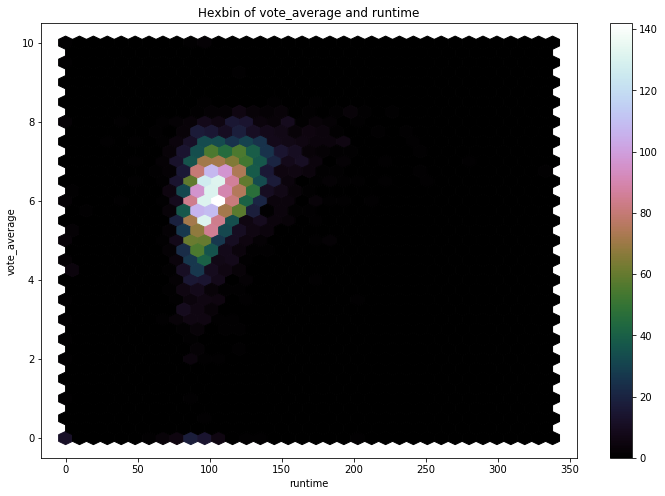

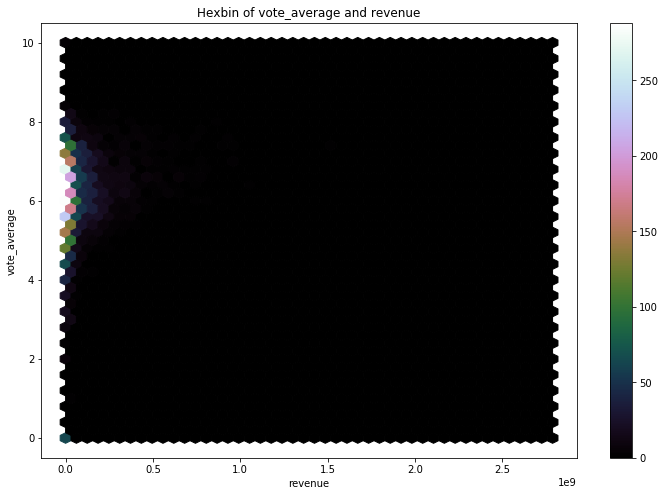

In [13]:
movie.plot(y = 'vote_average', x = 'runtime', kind = 'hexbin', gridsize=35, sharex=False, 
           colormap='cubehelix', title='Hexbin of vote_average and runtime',figsize=(12,8))
movie.plot(y ='vote_average', x = 'revenue', kind='hexbin', gridsize = 45, sharex = False,
          colormap = 'cubehelix', title='Hexbin of vote_average and revenue', figsize = (12,8))

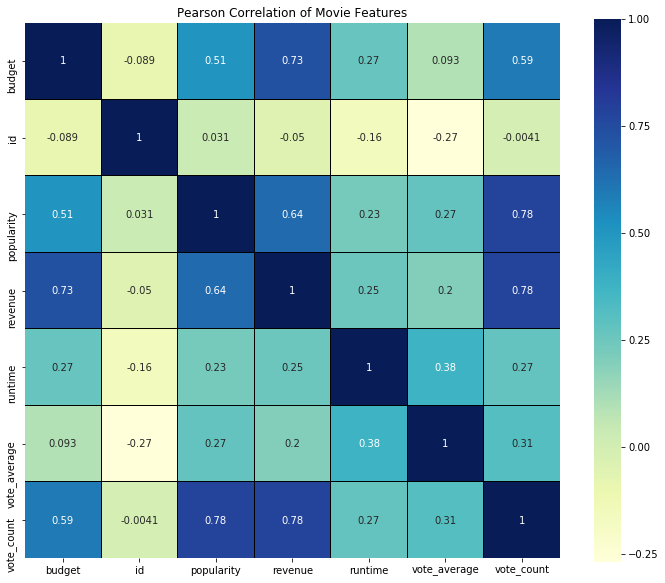

In [14]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [15]:
# Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

NameError: name 'X_std' is not defined

In [16]:
# Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(x_std, axis=0)
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [17]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [18]:
cum_var_exp

array([ 46.79589959,  66.04199613,  78.00935894,  88.14763754,
        94.03694228,  97.71814304, 100.        ])

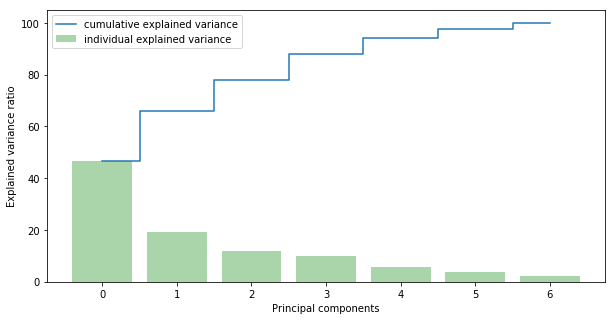

In [19]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [20]:
movie_num.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4803.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.831355,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.712156,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,117.500000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


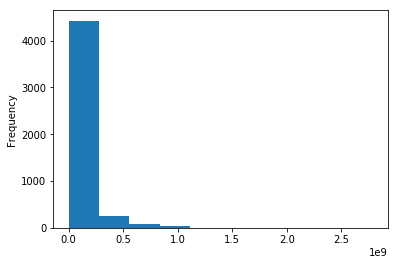

In [21]:
movie['revenue'].plot.hist()

In [22]:
movie['revenue_classes'] = pd.cut(movie['revenue'],10)
movie['vote_classes'] = pd.cut(movie['vote_average'],4, labels=["low", "medium-low","medium-high","high"])
#movie['vote_classes'] = pd.cut(movie['vote_average'],10, labels=["1", "2","3","4","5","6","7","8","9","10"])

In [23]:
list(movie)

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'revenue_classes',
 'vote_classes']

In [24]:
X_revenue = movie.ix[:,(0,8,18,19)].values
y_revenue = movie.ix[:,20].values

X_votes = movie.ix[:,(0,8,12,19)].values
y_votes = movie.ix[:,21].values

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-package

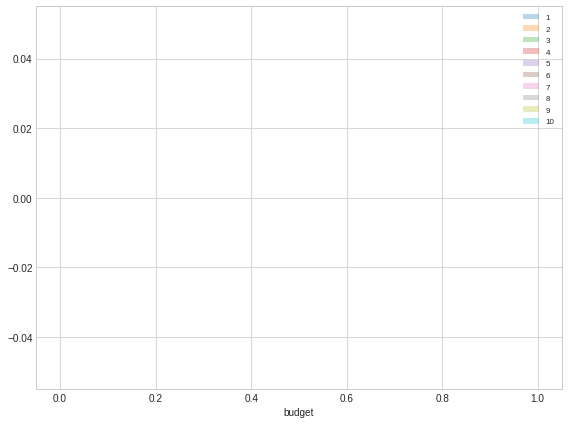

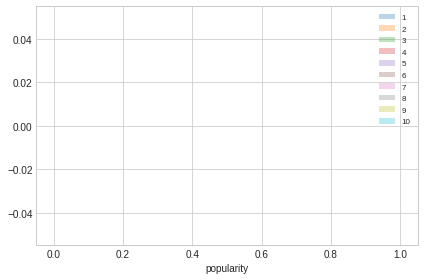

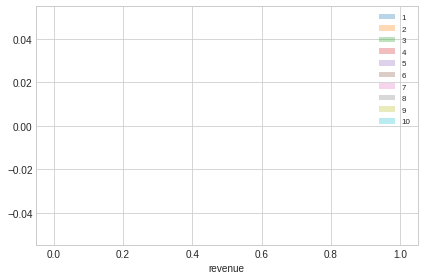

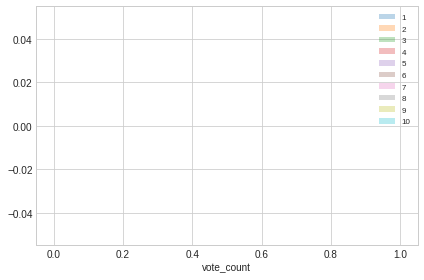

In [25]:
from matplotlib import pyplot as plt
import numpy as np
import math

feature_dict ={0:'budget',
              1: 'popularity',
              2: 'revenue',
              3: 'vote_count'}

#Use this block for a cut in 4 blocks
'''
label_dict = {1: 'low',
              2: 'medium-low',
              3: 'medium-high',
              4: 'high'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        for lab in('low', 'medium-low','medium-high','high'):
            plt.hist(X_votes[y_votes==lab, cnt],
                    label = lab,
                    bins = 10,
                    alpha = 0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        
        plt.tight_layout()
        plt.show()
'''

#Use this block for a cut in 10 blocks.
label_dict = {0: '0-1',
               1: '1-2',
               2: '2-3',
               3: '3-4',
               4: '4-5',
               5: '5-6',
               6: '6-7',
               7: '7-8',
               8: '8-9',
               9: '9-10'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8,6))
    for cnt in range(4):
        for lab in("1", "2","3","4","5","6","7","8","9","10"):
            plt.hist(X_votes[y_votes==lab, cnt],
                    label = lab,
                    bins = 10,
                    alpha = 0.3,)
            plt.xlabel(feature_dict[cnt])
        plt.legend(loc='upper right', fancybox=True, fontsize=8)
        
        plt.tight_layout()
        plt.show()

In [26]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X_votes)

In [27]:
import numpy as np
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NameError: name 'X_std' is not defined

In [28]:
import numpy as np
print('NumPy covariance matrix: \n%s' %np.cov(x_std.T))

NumPy covariance matrix: 
[[1.00020825 0.50551925 0.73097505 0.59330387]
 [0.50551925 1.00020825 0.64485777 0.77829193]
 [0.73097505 0.64485777 1.00020825 0.78165007]
 [0.59330387 0.77829193 0.78165007 1.00020825]]


In [29]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

NameError: name 'X_std' is not defined

In [30]:
cov_mat = np.cov(x_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.46394653  0.71405053 -0.47770087  0.21607254]
 [ 0.48445353 -0.58864332 -0.55779621 -0.32812682]
 [ 0.52429495  0.2204714   0.5709629  -0.59203761]
 [ 0.52456953 -0.30825842  0.36696953  0.70365966]]

Eigenvalues 
[3.02495933 0.55303772 0.26102735 0.16180859]


In [31]:
cor_mat1 = np.corrcoef(x_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.46394653  0.71405053 -0.47770087  0.21607254]
 [ 0.48445353 -0.58864332 -0.55779621 -0.32812682]
 [ 0.52429495  0.2204714   0.5709629  -0.59203761]
 [ 0.52456953 -0.30825842  0.36696953  0.70365966]]

Eigenvalues 
[3.02432952 0.55292258 0.260973   0.1617749 ]


In [33]:
cor_mat2 = np.corrcoef(x.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.42955888  0.15819614 -0.34273569 -0.3550502  -0.4894082  -0.20147103
  -0.51654021]
 [ 0.06779967  0.60459644  0.7334906  -0.11671238 -0.2784456   0.01690392
  -0.02045508]
 [-0.45577203  0.15529443  0.14554958  0.30378859  0.53924     0.31687815
  -0.5133145 ]
 [-0.48744498  0.17519204 -0.17822059 -0.04322275 -0.1956749   0.58394913
   0.56461412]
 [-0.25254313 -0.45149207  0.38140145 -0.71780564  0.26075222  0.01996444
   0.05722393]
 [-0.23292115 -0.5775      0.37625325  0.45699826 -0.50171217  0.04588706
  -0.08948099]
 [-0.49751516  0.13144268  0.06740142  0.20510853  0.1848578  -0.71778209
   0.37310253]]

Eigenvalues 
[3.27571297 1.34722676 0.8377154  0.7096795  0.41225133 0.15972999
 0.25768405]


In [35]:
u,s,v = np.linalg.svd(x_std.T)
u

array([[-0.46394653,  0.71405053,  0.47770087,  0.21607254],
       [-0.48445353, -0.58864332,  0.55779621, -0.32812682],
       [-0.52429495,  0.2204714 , -0.5709629 , -0.59203761],
       [-0.52456953, -0.30825842, -0.36696953,  0.70365966]])

In [36]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [37]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.275712971440096
1.347226757817995
0.8377153968047574
0.7096795019866746
0.41225133180679246
0.2576840531257675
0.15972998701792046


In [38]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)
print(cum_var_exp)

[46.79589959200135, 19.246096540257067, 11.967362811496528, 10.138278599809633, 5.889304740097033, 3.681200758939534, 2.2818569573988627]
[ 46.79589959  66.04199613  78.00935894  88.14763754  94.03694228
  97.71814304 100.        ]


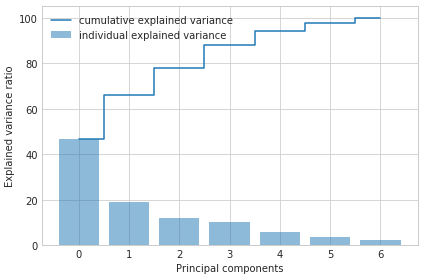

In [39]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()